In [1]:
import sys
import os
os.chdir('..')
sys.path.append('py//models')
from model_funs import *
X, y = get_x_y('data_for_modelling')
X_hold, y_hold = get_x_y('holdout')

In [2]:
grid_search = GridSearchCV(estimator = get_model_pipeline(X = X, 
                                                          model = LinearRegression(), 
                                                          poly_features = 1,
                                                          standartize = True
                                        ),
                            param_grid = {'model__fit_intercept':  [True, False]},
                            scoring = 'neg_mean_absolute_error',
                            cv = 5,
                            verbose = 1,
                            n_jobs = 5
              )


grid_search.fit(X, y)

print("Best Parameters:", grid_search.best_params_)
print("Best MAE:", -grid_search.best_score_)

print("")
print("")

Fitting 5 folds for each of 2 candidates, totalling 10 fits
Best Parameters: {'model__fit_intercept': True}
Best MAE: 30553013399020.008




In [8]:
for degree in range(1, 3):
    grid_search = GridSearchCV(estimator = get_model_pipeline(X = X, 
                                                              model = Lasso(tol = 0.001), 
                                                              poly_features = degree,
                                                              standartize = True
                                            ),
                                param_grid = {'model__alpha': [np.arange(366, 368, 0.33),
                                                               np.arange(586, 589, 0.33)
                                                              ][degree - 1]
                                             },
                                scoring = 'neg_mean_absolute_error',
                                cv = 5,
                                verbose = 1,
                                n_jobs = 5
                  )
    

    grid_search.fit(X, y)
    
    print("Best Parameters:", grid_search.best_params_)
    print("Best MAE:", -grid_search.best_score_)
    print(f"poly_degree: {degree}")

    print("")
    print("")

Fitting 5 folds for each of 7 candidates, totalling 35 fits
Best Parameters: {'model__alpha': 366.98999999999995}
Best MAE: 24549.568613318836
poly_degree: 1


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters: {'model__alpha': 587.6500000000002}
Best MAE: 22545.452653514287
poly_degree: 2




In [12]:
for degree in range(1, 3):
    grid_search = GridSearchCV(estimator = get_model_pipeline(X = X, 
                                                              model = Lasso(tol = 0.001), 
                                                              poly_features = degree,
                                                              pca_groups = get_PCA_groups(X, ('all', 1)),
                                                              standartize = True
                                            ),
                                param_grid = {'model__alpha': [np.arange(340, 370, 5), 
                                                               np.arange(550, 620, 10)
                                                              ][degree - 1]
                                             },
                                scoring = 'neg_mean_absolute_error',
                                cv = 5,
                                verbose = 1,
                                n_jobs = 5
                  )
    

    grid_search.fit(X, y)
    
    print("Best Parameters:", grid_search.best_params_)
    print("Best MAE:", -grid_search.best_score_)
    print(f"poly_degree: {degree}")

    print("")
    print("")

all: Explained Variance Ratio per Component: [0.26122786]
all: Cumulative Explained Variance: 0.2612
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best Parameters: {'model__alpha': 365}
Best MAE: 24549.55176665341
poly_degree: 1


all: Explained Variance Ratio per Component: [0.26122786]
all: Cumulative Explained Variance: 0.2612
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Best Parameters: {'model__alpha': 590}
Best MAE: 22545.55874112795
poly_degree: 2




In [18]:
i = 1
patterns_components = [['parks', min(i, 9)], 
                           ['edu', min(i, 6)],
                           ['shops', min(i, 5)],
                           ['moscow_stations', min(i, 5)],
                           ['bus_stops', min(i, 5)],
                           ['eco', min(i, 5)],
                           ['hospitals',  min(i, 2)]
                          ]

for degree in range(1, 3):
    grid_search = GridSearchCV(estimator = get_model_pipeline(X = X, 
                                                              model = Lasso(tol = 0.001), 
                                                              poly_features = degree,
                                                              pca_groups = get_PCA_groups(X, patterns_components),
                                                              standartize = True
                                            ),
                                param_grid = {'model__alpha': [np.arange(370, 385, 5), 
                                                               np.arange(600, 700, 10)
                                                              ][degree - 1]
                                             },
                                scoring = 'neg_mean_absolute_error',
                                cv = 5,
                                verbose = 1,
                                n_jobs = 5
                  )
    

    grid_search.fit(X, y)
    
    print("Best Parameters:", grid_search.best_params_)
    print("Best MAE:", -grid_search.best_score_)
    print(f"poly_degree: {degree}")

    print("")
    print("")

parks: Explained Variance Ratio per Component: [0.32376045]
parks: Cumulative Explained Variance: 0.3238
edu: Explained Variance Ratio per Component: [0.52977431]
edu: Cumulative Explained Variance: 0.5298
shops: Explained Variance Ratio per Component: [0.395567]
shops: Cumulative Explained Variance: 0.3956
moscow_stations: Explained Variance Ratio per Component: [0.50439374]
moscow_stations: Cumulative Explained Variance: 0.5044
bus_stops: Explained Variance Ratio per Component: [0.49780078]
bus_stops: Cumulative Explained Variance: 0.4978
eco: Explained Variance Ratio per Component: [0.49611701]
eco: Cumulative Explained Variance: 0.4961
hospitals: Explained Variance Ratio per Component: [0.76014283]
hospitals: Cumulative Explained Variance: 0.7601
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best Parameters: {'model__alpha': 375}
Best MAE: 24550.071935219334
poly_degree: 1


parks: Explained Variance Ratio per Component: [0.32376045]
parks: Cumulative Explained Varian

In [17]:
model = grid_search.best_estimator_
errors = model.predict(X_hold) - y_hold
print(np.abs(errors).describe())
get_MAE(errors)
get_MAPE(errors, y_hold)

count     1000.0000
mean     22510.4595
std      25771.9965
min          3.8199
25%       6000.5232
50%      14097.9346
75%      28654.1722
max     193378.3939
Name: price, dtype: float64
MAE 22510.459509997883
MAPE 19.93186719079606%


0.1993186719079606

In [31]:
print(f"errors 95%: {np.quantile(errors, 0.95)}")
print(f"errors 5%: {np.quantile(errors, 0.05)}")

errors 95%: 41014.18913118601
errors 5%: -71225.16803797727


In [34]:
print(f"errors 95%: {np.quantile(np.abs(errors), 0.95)}")

errors 95%: 76466.69723962292


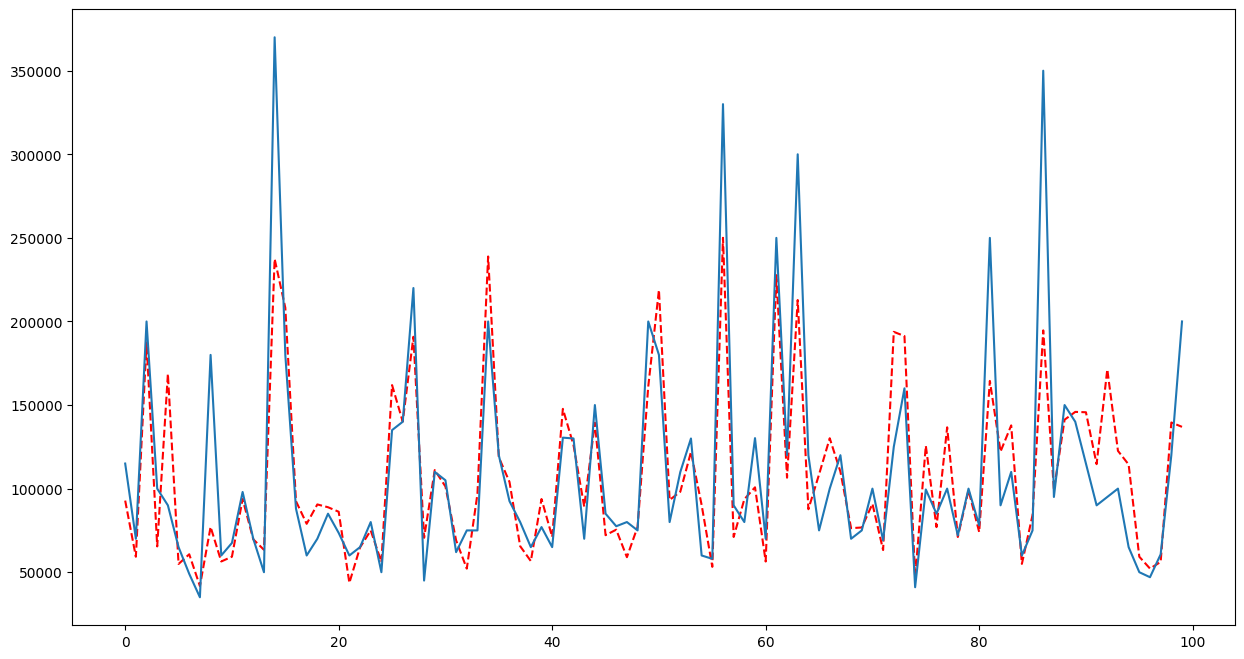

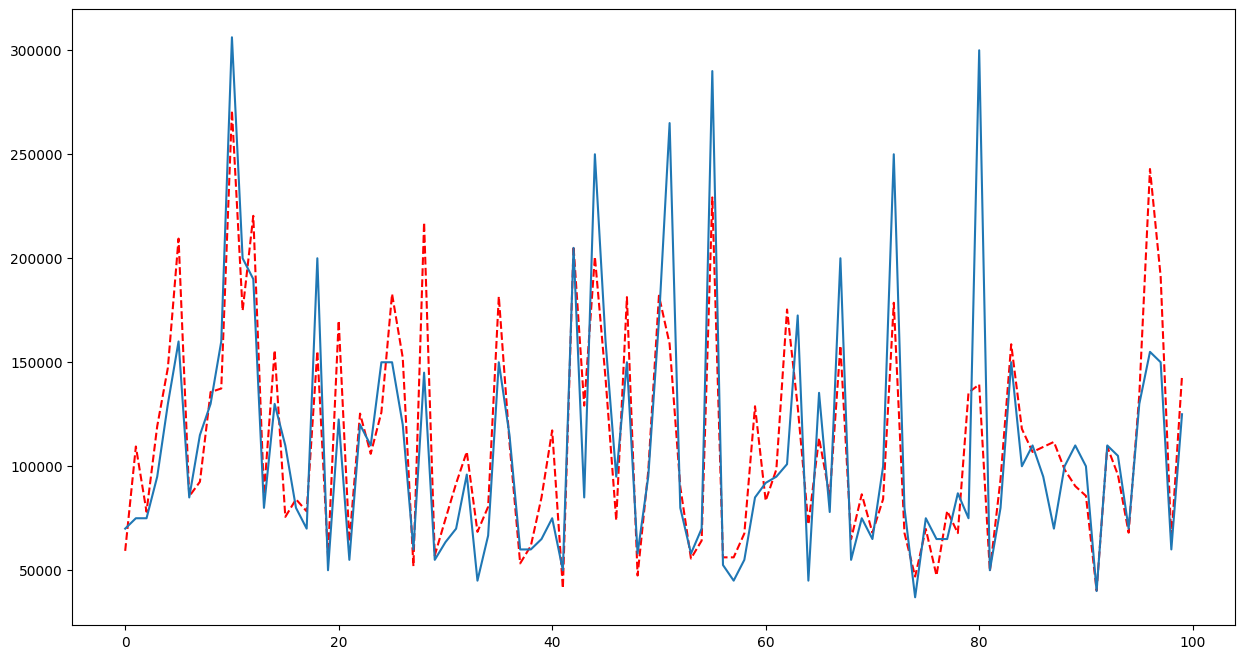

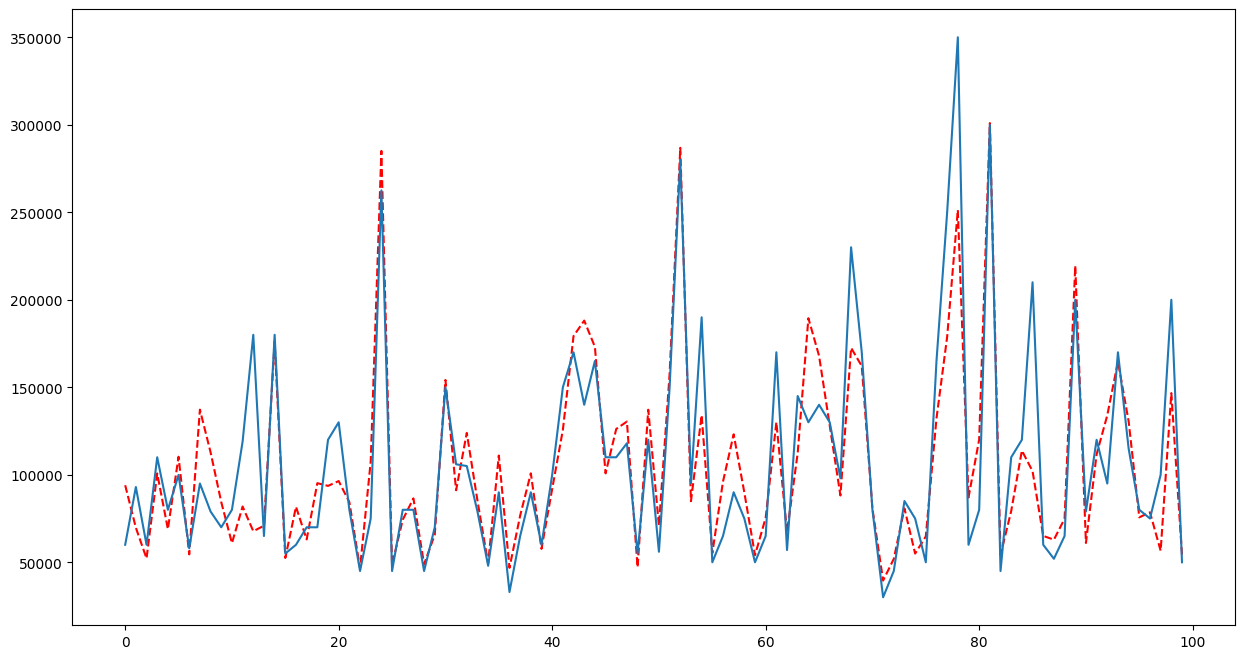

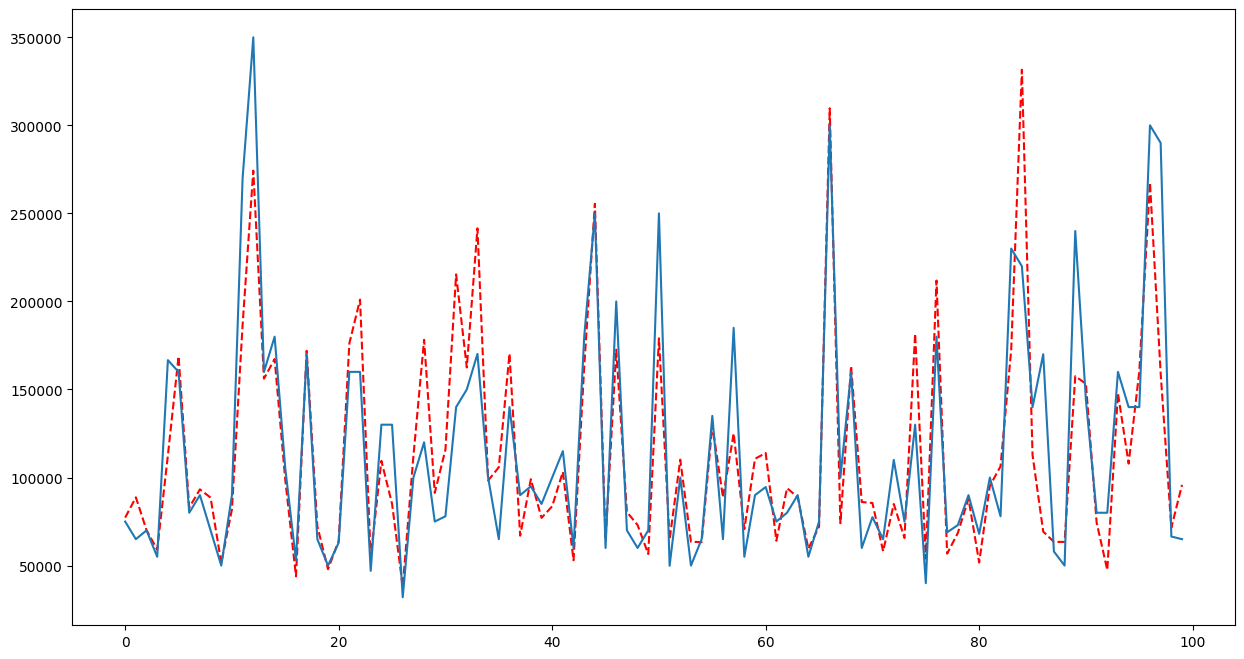

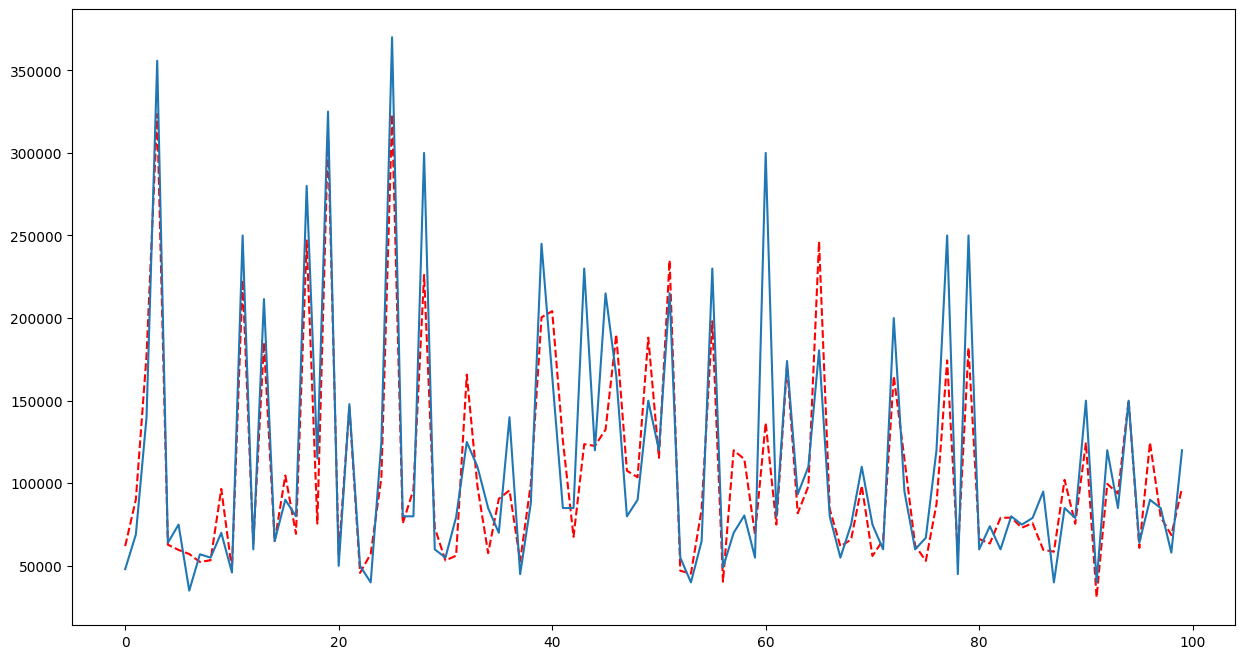

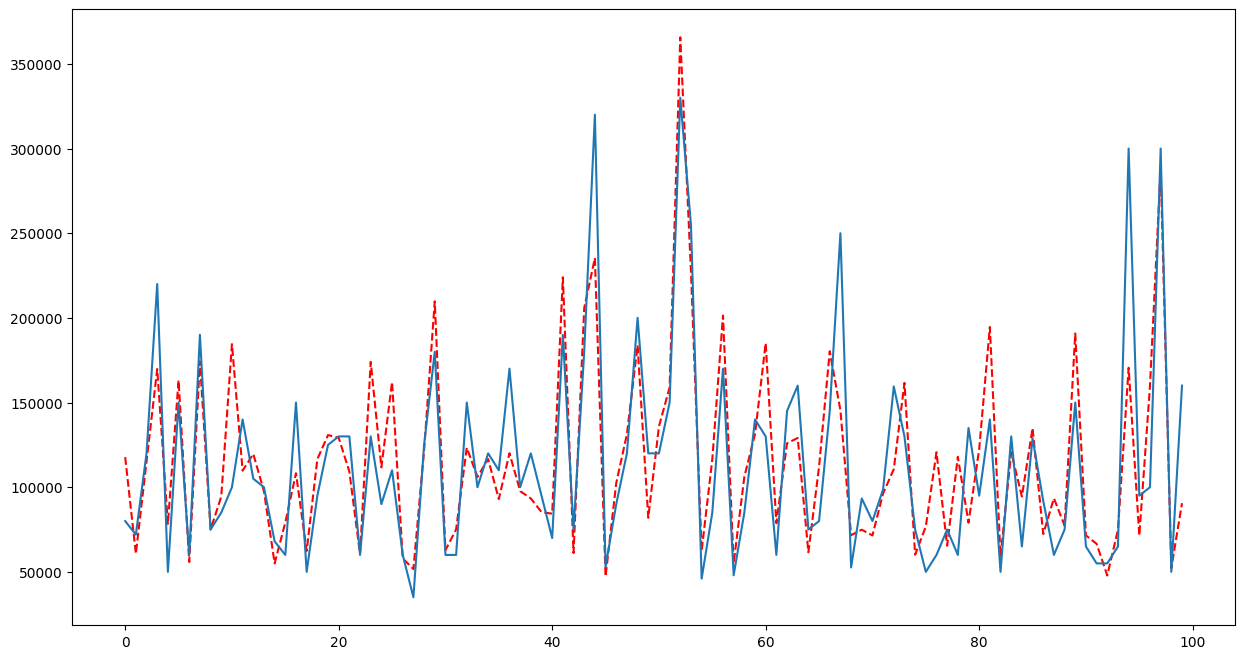

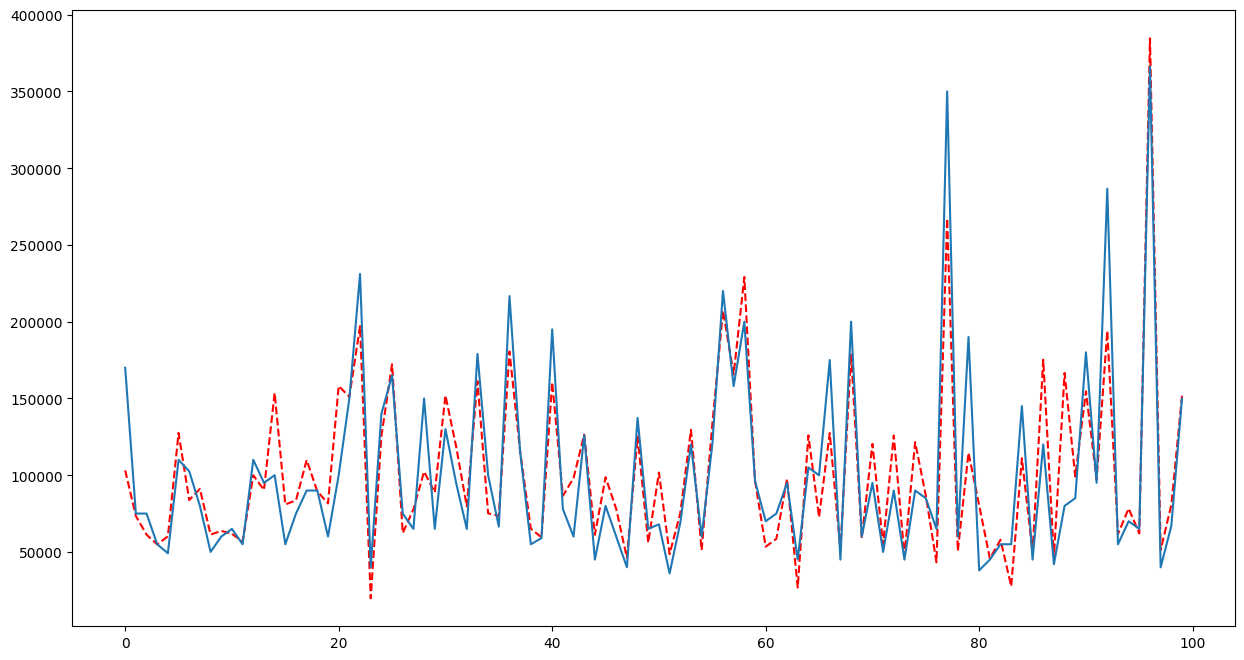

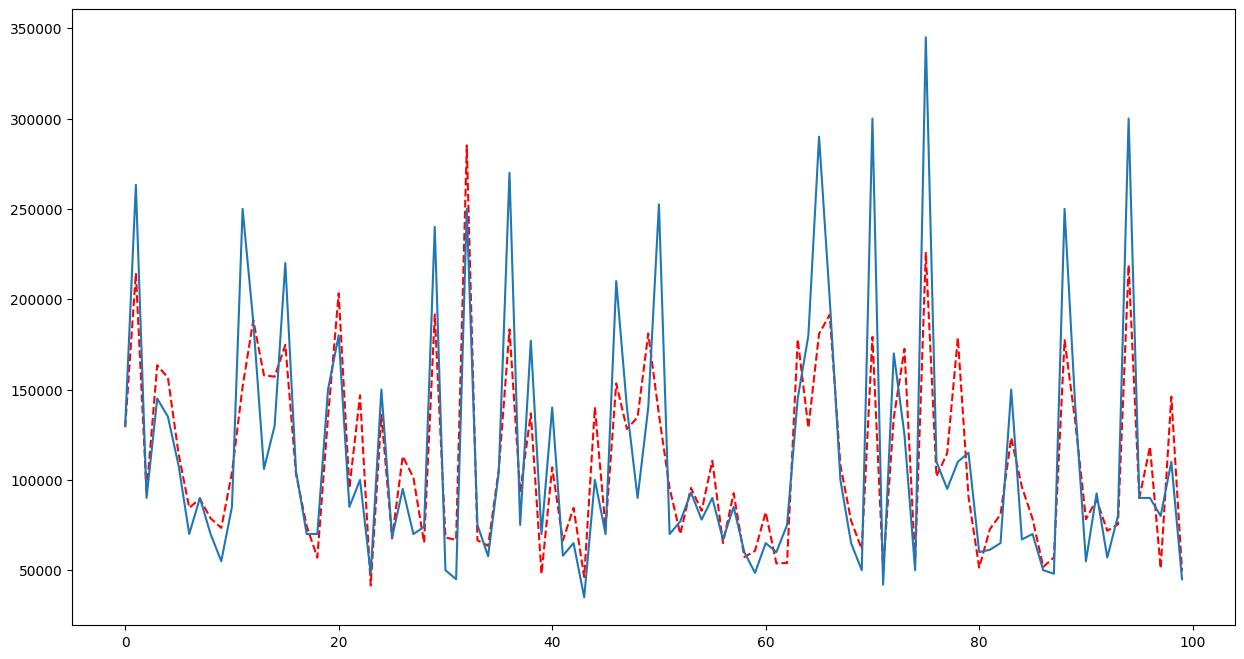

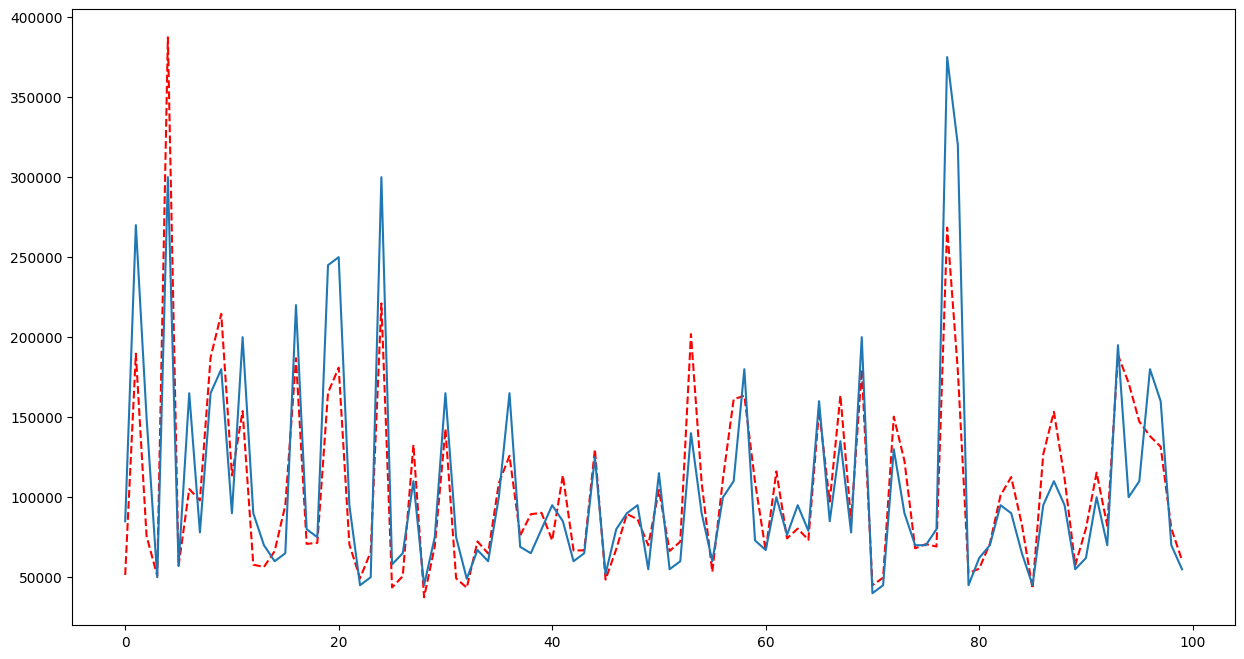

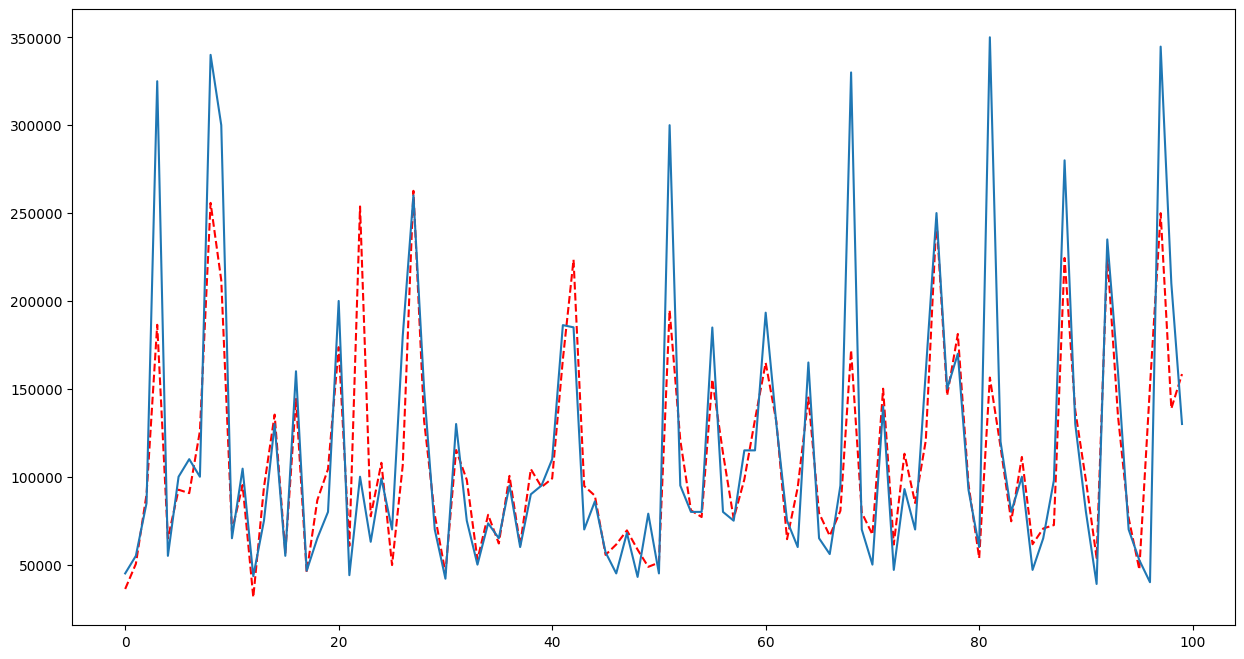

In [33]:
for num in np.arange(0, 1000, 100):
    plt.figure(figsize = (15, 8))
    plt.plot(range(100), model.predict(X_hold)[num:(num + 100)], color = 'red', linestyle = '--')
    plt.plot(range(100), y_hold[num:(num + 100)])
    plt.show()